In [1]:
import graphviz

This example uses GraphViz, one of the most fun open source packages. I like GraphViz because it can do simple graph visualizations and help us to model the curriculum in a more organic way.

Initial ideas for curriculum...

- red = core-only or should be core only
- purple = course we should consider reinstating
- yellow - possible candidate for renewal or retirement

In [2]:
def set_general_cluster_properties(c):
    c.attr(style='filled')
    c.attr(color='lightgrey')
    c.node_attr.update(style='filled', color='white')


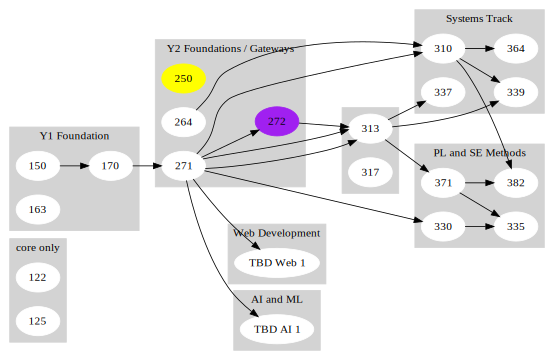

In [6]:
from graphviz import Digraph

def get_cs():
    curriculum = Digraph('G', filename='curriculum.gv')
    curriculum.attr(compound='true')
    curriculum.body.extend(['rankdir=LR', 'size="8,5"'])

    
    with curriculum.subgraph(name='cluster_core') as cluster:
        set_general_cluster_properties(cluster)
        cluster.node('122')
        cluster.node('125')
        cluster.attr(label='core only')

    with curriculum.subgraph(name='cluster_foundation_y1') as cluster:
        set_general_cluster_properties(cluster)
        cluster.node('150')
        cluster.node('163')
        cluster.edge('150', '170')
        cluster.attr(label='Y1 Foundation')


    with curriculum.subgraph(name='cluster_foundation_year2') as cluster:
        set_general_cluster_properties(cluster)
        cluster.node('250', color='yellow')
        cluster.node('272', color='purple')
        cluster.node('264')
        cluster.edge('271','272')
        cluster.attr(label='Y2 Foundations / Gateways')



    with curriculum.subgraph(name='cluster_y3') as cluster:
        set_general_cluster_properties(cluster)
        cluster.edge('272', '313')
        cluster.node('317')

    with curriculum.subgraph(name='cluster_systems') as cluster:
        set_general_cluster_properties(cluster)
        cluster.edge('310', '339')
        cluster.edge('310', '364')
        cluster.edge('313', '339')
        cluster.edge('313', '337')
        cluster.attr(label='Systems Track')

    curriculum.edge('264', '310')
    curriculum.edge('271', '310')

    with curriculum.subgraph(name='cluster_plse') as cluster:
        set_general_cluster_properties(cluster)
        cluster.edge('271', '313')
        cluster.edge('271', '330')
        cluster.edge('313', '371')
        cluster.edge('330', '335')
        cluster.edge('371', '335')
        cluster.edge('371', '382')
        cluster.edge('310', '382')
        cluster.attr(label='PL and SE Methods')


    with curriculum.subgraph(name='cluster_web') as cluster:
        set_general_cluster_properties(cluster)
        cluster.edge('271', 'TBD Web 1')
        cluster.attr(label='Web Development')

    with curriculum.subgraph(name='cluster_ai') as cluster:
        set_general_cluster_properties(cluster)
        cluster.edge('271', 'TBD AI 1')
        cluster.attr(label='AI and ML')


    curriculum.edge('170', '271')
    curriculum.edge('271', '313')
    return curriculum

cs = get_cs()
cs.save()


cs